# Ultralytics YOLO V3 Inference

In [1]:
import warnings
warnings.filterwarnings('ignore')

# GPU 정보 확인

In [2]:
!nvidia-smi

Fri Jul 28 11:02:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# I. Ultralytics YOLO v3 설치

* https://github.com/ultralytics/yolov3

>## 1) YOLO v3 Git Clone

* 현재 작업 디렉토리 확인

In [3]:
!pwd

/content


* Git Clone

In [4]:
!git clone https://github.com/ultralytics/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 10744, done.
remote: Counting objects: 100% (666/666), done.
remote: Compressing objects: 100% (342/342), done.
remote: Total 10744 (delta 433), reused 526 (delta 323), pack-reused 10078
Receiving objects: 100% (10744/10744), 9.81 MiB | 23.91 MiB/s, done.
Resolving deltas: 100% (7232/7232), done.


* 결과 확인

In [5]:
!ls -l

total 8
drwxr-xr-x 1 root root 4096 Jul 26 13:33 sample_data
drwxr-xr-x 9 root root 4096 Jul 28 11:02 yolov3


>## 2)작업 디렉토리 변경

* /content/yolov3

In [6]:
%cd yolov3

/content/yolov3


* 결과 확인

In [7]:
!pwd

/content/yolov3


>## 3) Install Dependencies

* requirements.txt 확인

In [8]:
!cat requirements.txt

# YOLOv3 requirements
# Usage: pip install -r requirements.txt

# Base ------------------------------------------------------------------------
gitpython>=3.1.30
matplotlib>=3.3
numpy>=1.18.5
opencv-python>=4.1.1
Pillow>=7.1.2
psutil  # system resources
PyYAML>=5.3.1
requests>=2.23.0
scipy>=1.4.1
thop>=0.1.1  # FLOPs computation
torch>=1.7.0  # see https://pytorch.org/get-started/locally (recommended)
torchvision>=0.8.1
tqdm>=4.64.0
ultralytics>=8.0.111
# protobuf<=3.20.1  # https://github.com/ultralytics/yolov5/issues/8012

# Logging ---------------------------------------------------------------------
# tensorboard>=2.4.1
# clearml>=1.2.0
# comet

# Plotting --------------------------------------------------------------------
pandas>=1.1.4
seaborn>=0.11.0

# Export ----------------------------------------------------------------------
# coremltools>=6.0  # CoreML export
# onnx>=1.10.0  # ONNX export
# onnx-simplifier>=0.4.1  # ONNX simplifier
# nvidia-pyindex  # TensorRT export
# nvi

* requirements.txt 설치

In [9]:
!pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00


>## 4) torch 및 GPU 설정 확인

In [10]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


# II. Image Detection

* https://github.com/ultralytics/yolov3/blob/master/tutorial.ipynb


>## 1) Test Images

* Image 확인

In [11]:
!ls -l data/images

total 648
-rw-r--r-- 1 root root 487438 Jul 28 11:02 bus.jpg
-rw-r--r-- 1 root root 168949 Jul 28 11:02 zidane.jpg


>## 2) Inference 수행 (yolov3.pt, yolov3-tiny.pt)

* COCO Pretrained yolov3.pt Weight Download
* --project: runs/detect/exp 디렉토리에 Detection 결과 저장
 - --exist-ok: 결과 디렉토리 재성성하지 않음

In [12]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images --exist-ok --line-thickness 2

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['yolov3.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-98-g98130d

>## 3) Inference 결과

* runs/detect/exp

In [13]:
!ls -l runs/detect/exp

total 728
-rw-r--r-- 1 root root 494073 Jul 28 11:03 bus.jpg
-rw-r--r-- 1 root root 249539 Jul 28 11:03 zidane.jpg


* 결과 시각화

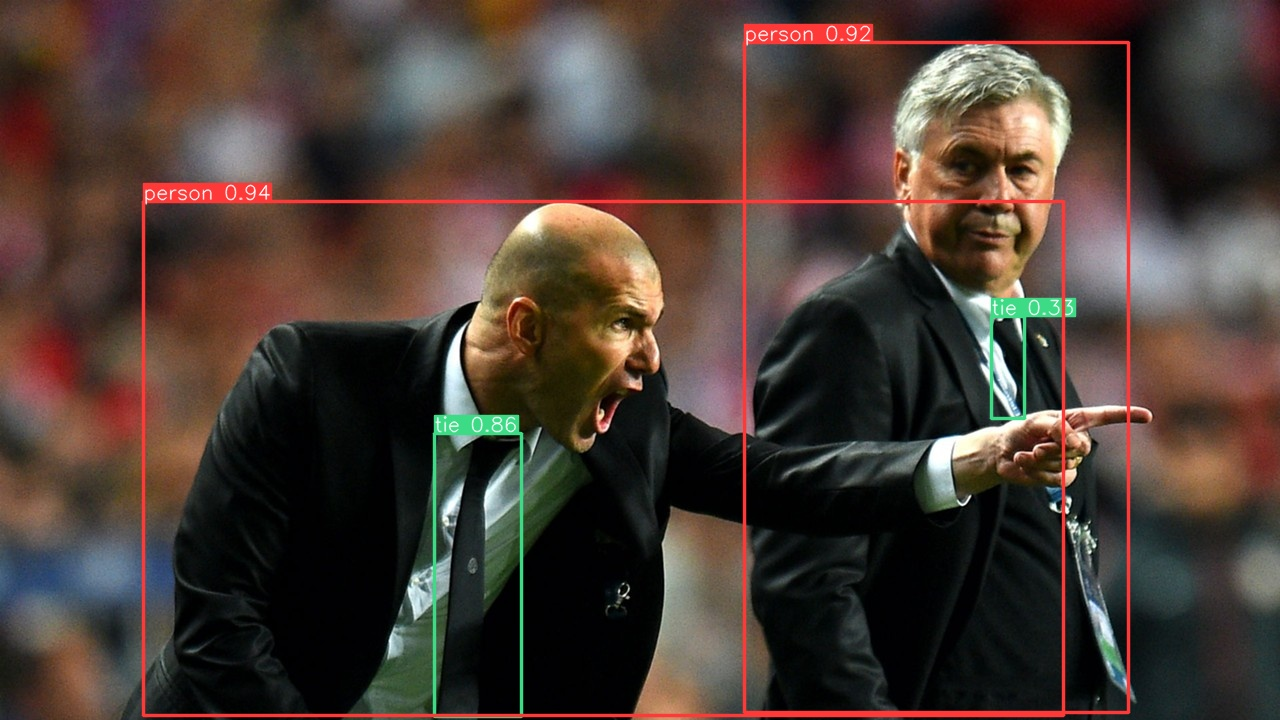

In [14]:
from IPython.display import Image, clear_output

Image(filename = 'runs/detect/exp/zidane.jpg')

># III. 추가 Image Detection

* 현재 작업 디렉토리

In [15]:
!pwd

/content/yolov3


>## 1) Image Download

In [16]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/KIA.jpg

--2023-07-28 11:03:29--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/KIA.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65805 (64K) [image/jpeg]
Saving to: ‘KIA.jpg’

KIA.jpg             100%[===================>]  64.26K  --.-KB/s    in 0.01s   

2023-07-28 11:03:29 (4.36 MB/s) - ‘KIA.jpg’ saved [65805/65805]



* 결과 확인

In [17]:
!ls -l KIA.jpg

-rw-r--r-- 1 root root 65805 Jul 28 11:03 KIA.jpg


>## 2) yolov3.pt Inference 수행

* --project /content/data:
* --name=run_image

In [18]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/yolov3/KIA.jpg --project /content/data  --name=run_image --exist-ok --line-thickness 1

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['yolov3.pt'], source=/content/yolov3/KIA.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3

>## 3) Inference 결과

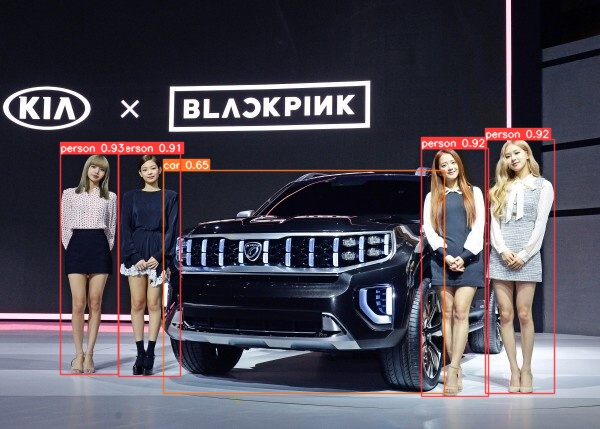

In [19]:
Image(filename = '/content/data/run_image/KIA.jpg')

>## 4) yolov3-tiny.pt Inference 수행

In [20]:
!python detect.py --weights yolov3-tiny.pt --img 640 --conf 0.25 --source /content/yolov3/KIA.jpg --project /content/data  --name=run_tiny --exist-ok --line-thickness 1

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['yolov3-tiny.pt'], source=/content/yolov3/KIA.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_tiny, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YO

>## 4) Inference 결과

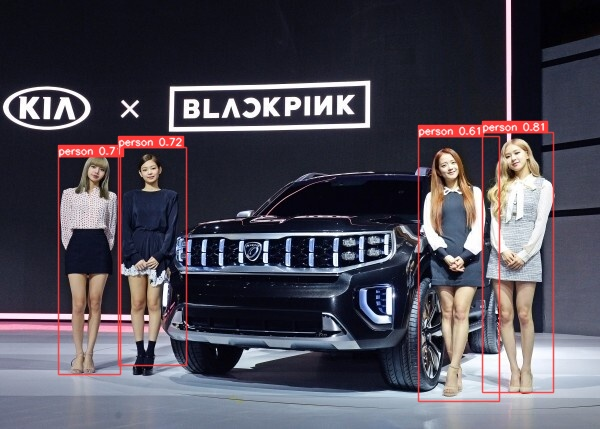

In [21]:
Image(filename = '/content/data/run_tiny/KIA.jpg')

# IV. Video Detection

>## 1) Video File Download

* matrix.mp4 다운로드

In [22]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/Matrix2.mp4

--2023-07-28 11:03:45--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/Matrix2.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17873420 (17M) [application/octet-stream]
Saving to: ‘Matrix2.mp4’

Matrix2.mp4         100%[===================>]  17.04M   113MB/s    in 0.2s    

2023-07-28 11:03:46 (113 MB/s) - ‘Matrix2.mp4’ saved [17873420/17873420]



* matrix.mp4 확인

In [ ]:
import io
import base64
from IPython.display import HTML

video = io.open('/content/yolov3/Matrix2.mp4', 'r+b').read()

encoded = base64.b64encode(video)

HTML(data='''<video width = "70%" controls>
                <source src = "data:video/mp4;base64,{0}" type = "video/mp4"/>
             </video>'''.format(encoded.decode('ascii')))

>## 2) Video Inference 수행

* --project=/content/data/run_video
 - 약 5분

In [ ]:
%%time

!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/yolov3/Matrix2.mp4 --project=/content/data --name=run_video --exist-ok --line-thickness 2

#
#
#
# End Of Document
#
#
#